# An introduction to POD

## Introduction

We analyze the following function:

$$
    f(x, t) = \mathrm{sech}(x) (1.0 - 0.5 \cos(2 t)) + \mathrm{sech}(x) \tanh(x) (1.0 - 0.5 \sin(2 t))
$$

In [1]:
# this will be removed once some basic requirements of the library are decided
import sys
sys.path.insert(0,'../../../')

## Importing from flowTorch

In this tutorial, we make use of the *FunctionDataloader* and the *POD* class provided by *flowTorch*. In general, all dataloader classes provide access to numerical data stored in different file formats like *CGNS*, *netCDF*, or *OpenFOAM*. The *FunctionDataloader* is an exception because it generates data based on a functional relationship. Such a class is helpful to create tutorials and unit tests. The *POD* class allows to compute the POD using several different numerical algorithms. The algorithms vary in their computational complexity and stability. For example, computing the POD by means of a singular value decomposition (SVD) is stable and accurate but requires a large amount of memory. Therefore, performing SVD on computational fluid dynamics (CFD) data will almost certainly exceed the available memory of any system. For such cases, *randomized* or *truncated* SVD is more feasible.

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from flowtorch.data import FunctionDataloader
from flowtorch.analysis import POD

%matplotlib inline

mpl.rcParams['figure.dpi'] = 160
rc('text', usetex=True)

## Creating an artificial dataset using a *FunctionDataloader*

In [3]:
def sech(x):
    """Hyperbolic secant function sech(x) = 1/cosh(x)."""
    return 1.0 / np.cosh(x)


def signal_function(x, t):
    """Evaluate the function f(x,t) given in the introduction."""
    return sech(x) * (1.0 - 0.5 * np.cos(2 * t)) + sech(x) * np.tanh(x) * (1.0 - 0.5 * np.sin(2 * t))

In [4]:
# spatial and temporal mesh points
x = np.linspace(-10.0, 10.0, 100)
t = np.linspace(0.0, 10.0, 30)
tt, xx = np.meshgrid(t, x)

data_loader = FunctionDataloader(function=signal_function, args=[xx, tt])
data_matrix = data_loader.get_data_matrix()

print("The data matrix has {:d} rows and {:d} columns.".format(*data_matrix.shape))

Finished attempt to create data matrix.
The data matrix has 100 rows and 30 columns.


## Snapshot POD

In [5]:
pod = POD(data_loader)
pod.compute_decomposition(mode="snapshot", solver="svd")

Finished attempt to create data matrix.


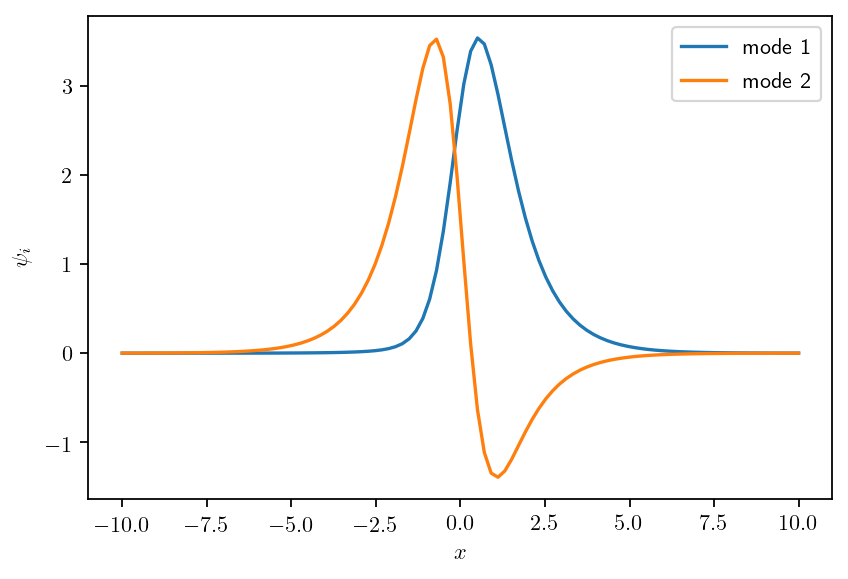

In [6]:
import torch as pt

spatial = pt.mm(data_matrix, pod._U)
plt.plot(x, -spatial[:,0] / pt.sqrt(pod._S[0]), label="mode 1")
plt.plot(x, spatial[:,1] / pt.sqrt(pod._S[1]), label="mode 2")
plt.xlabel(r"$x$")
plt.ylabel(r"$\psi_i$")
plt.legend()
plt.show()